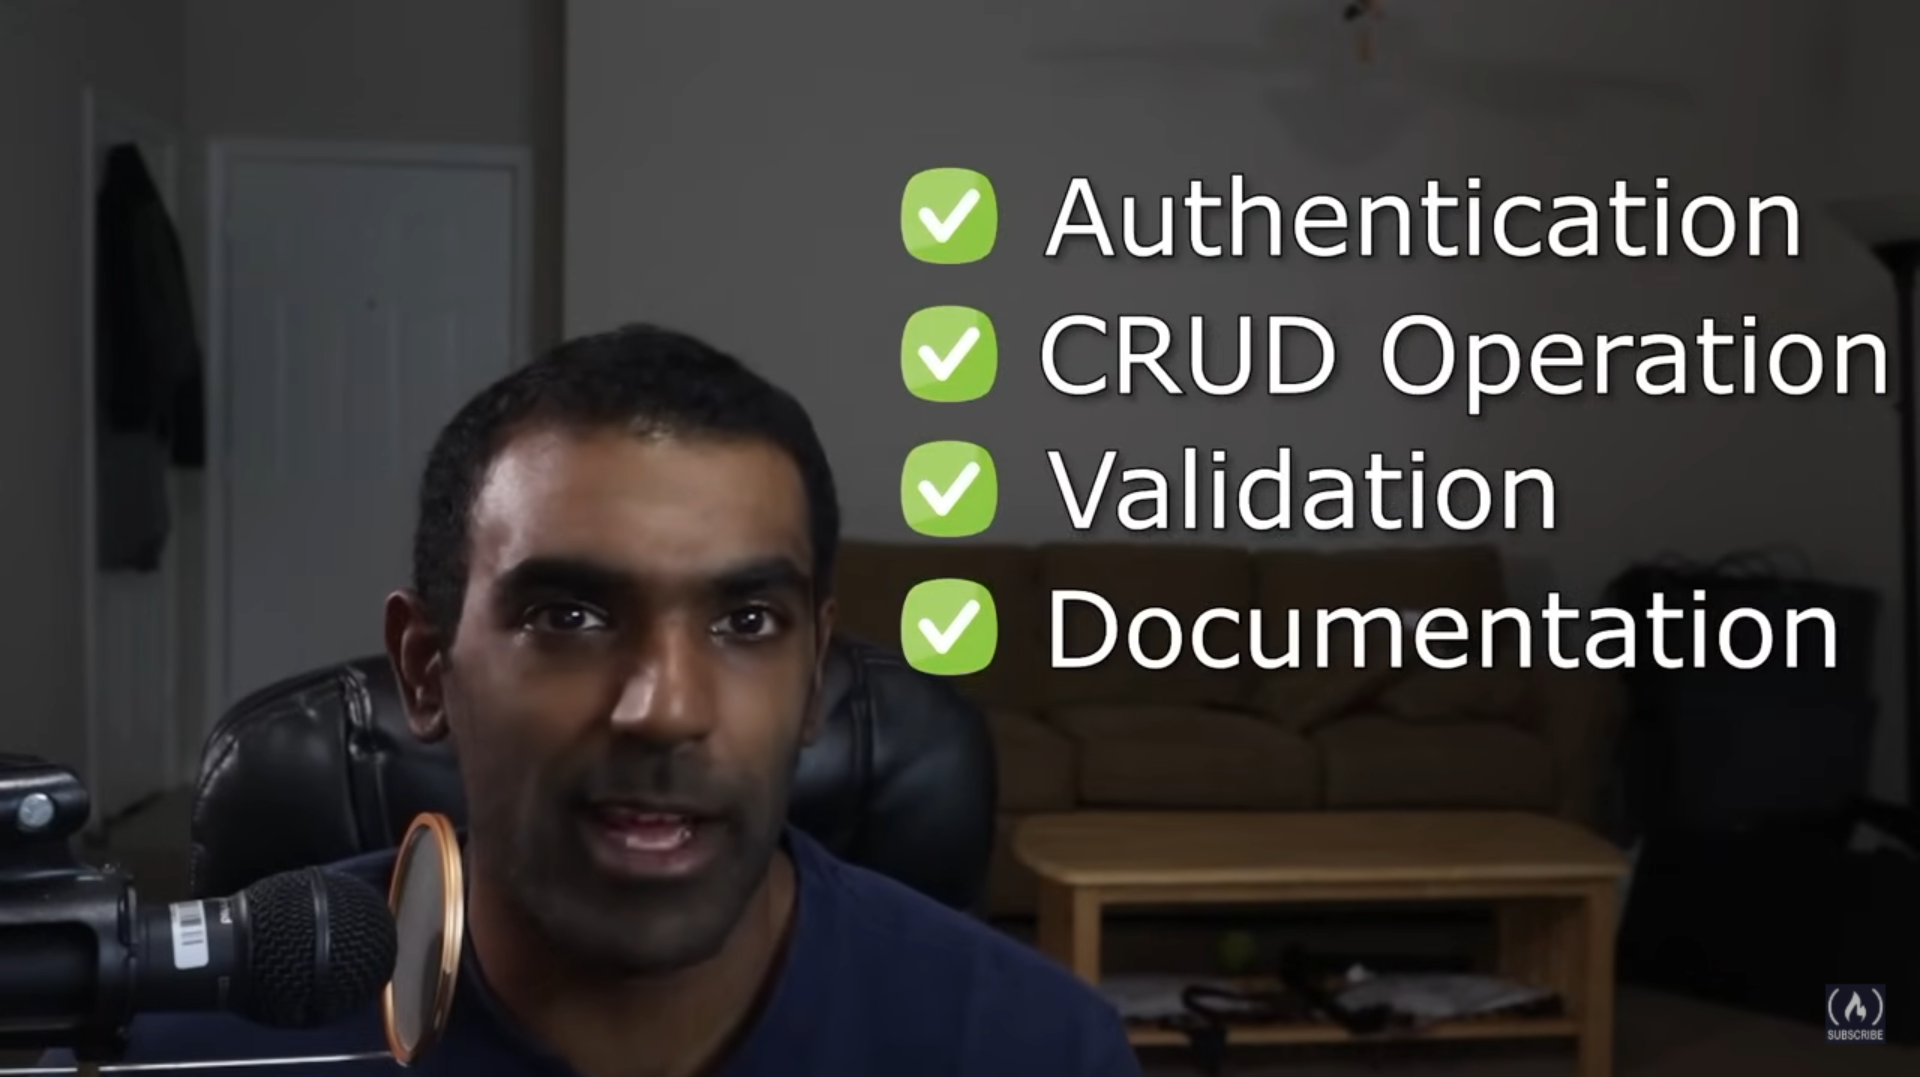

In [1]:
!python3 --version

Python 3.10.12


# **1- setting python virtual environment**


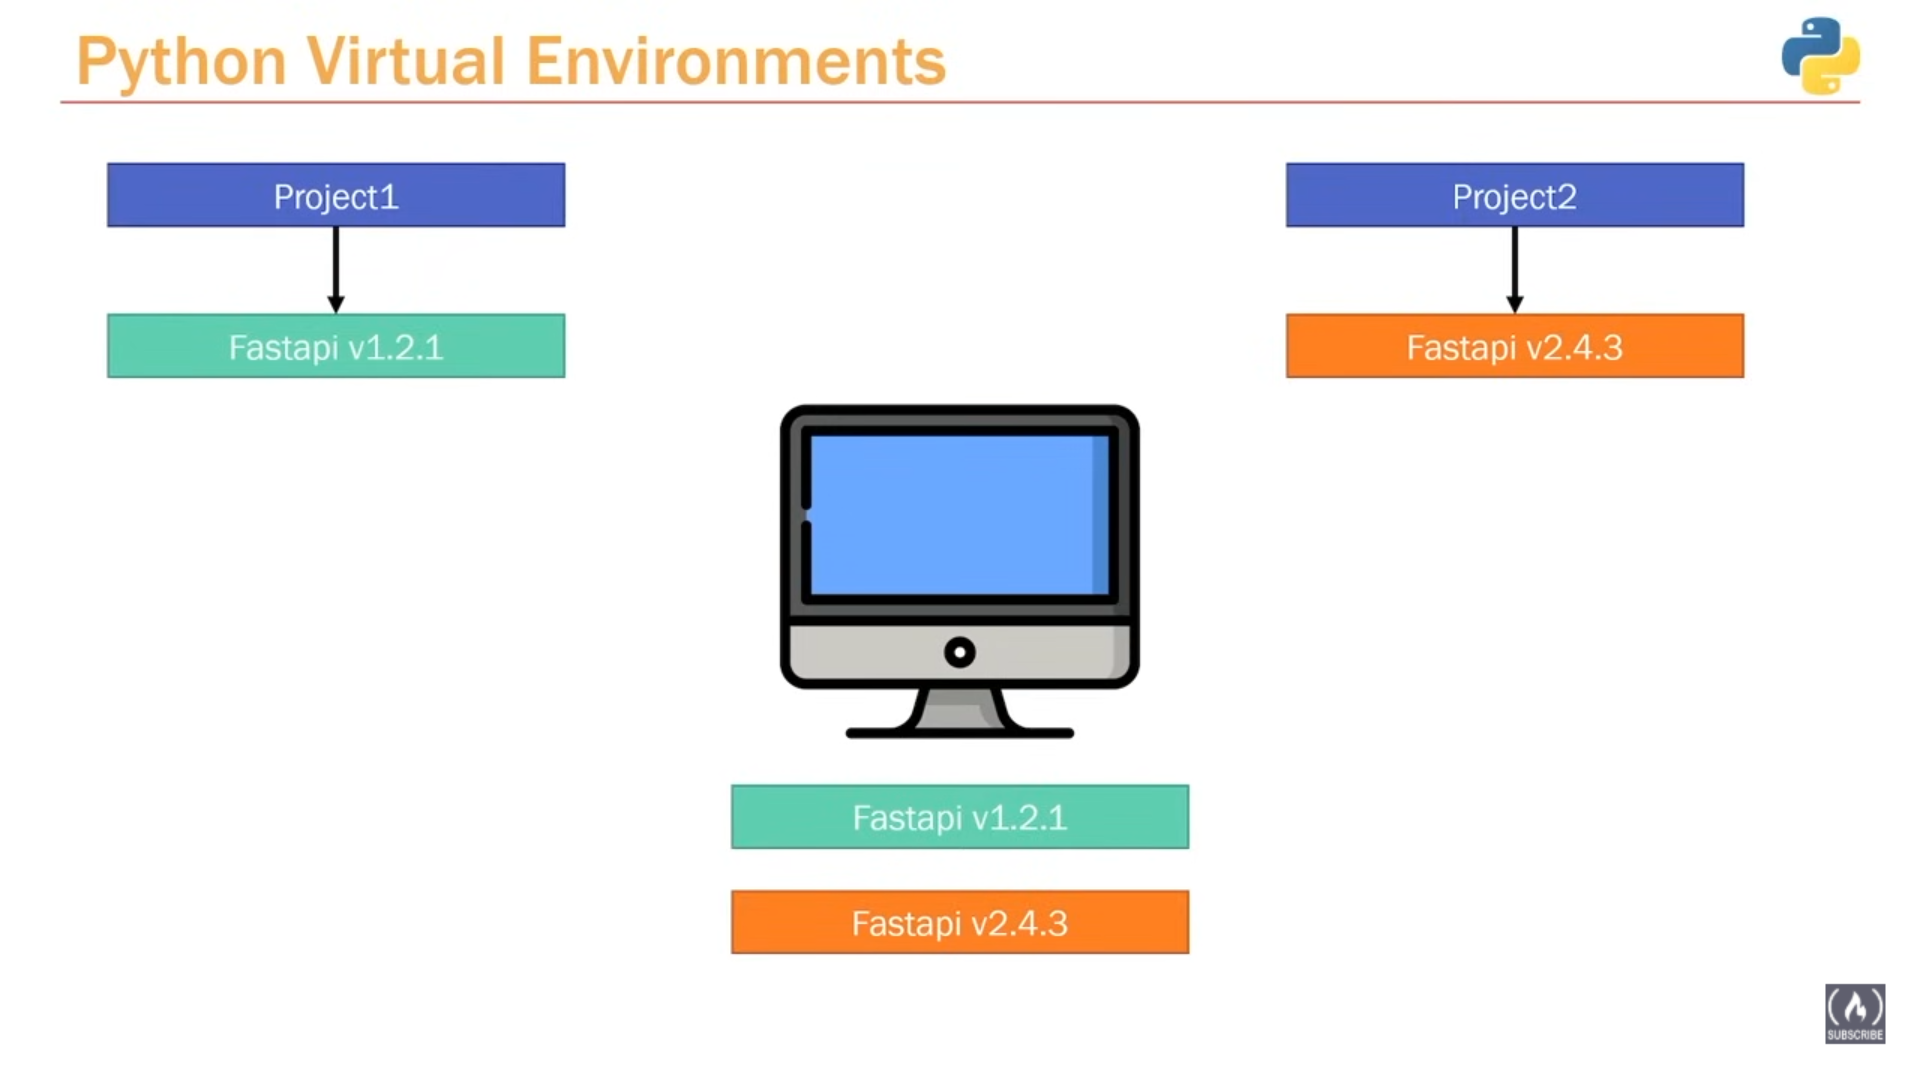

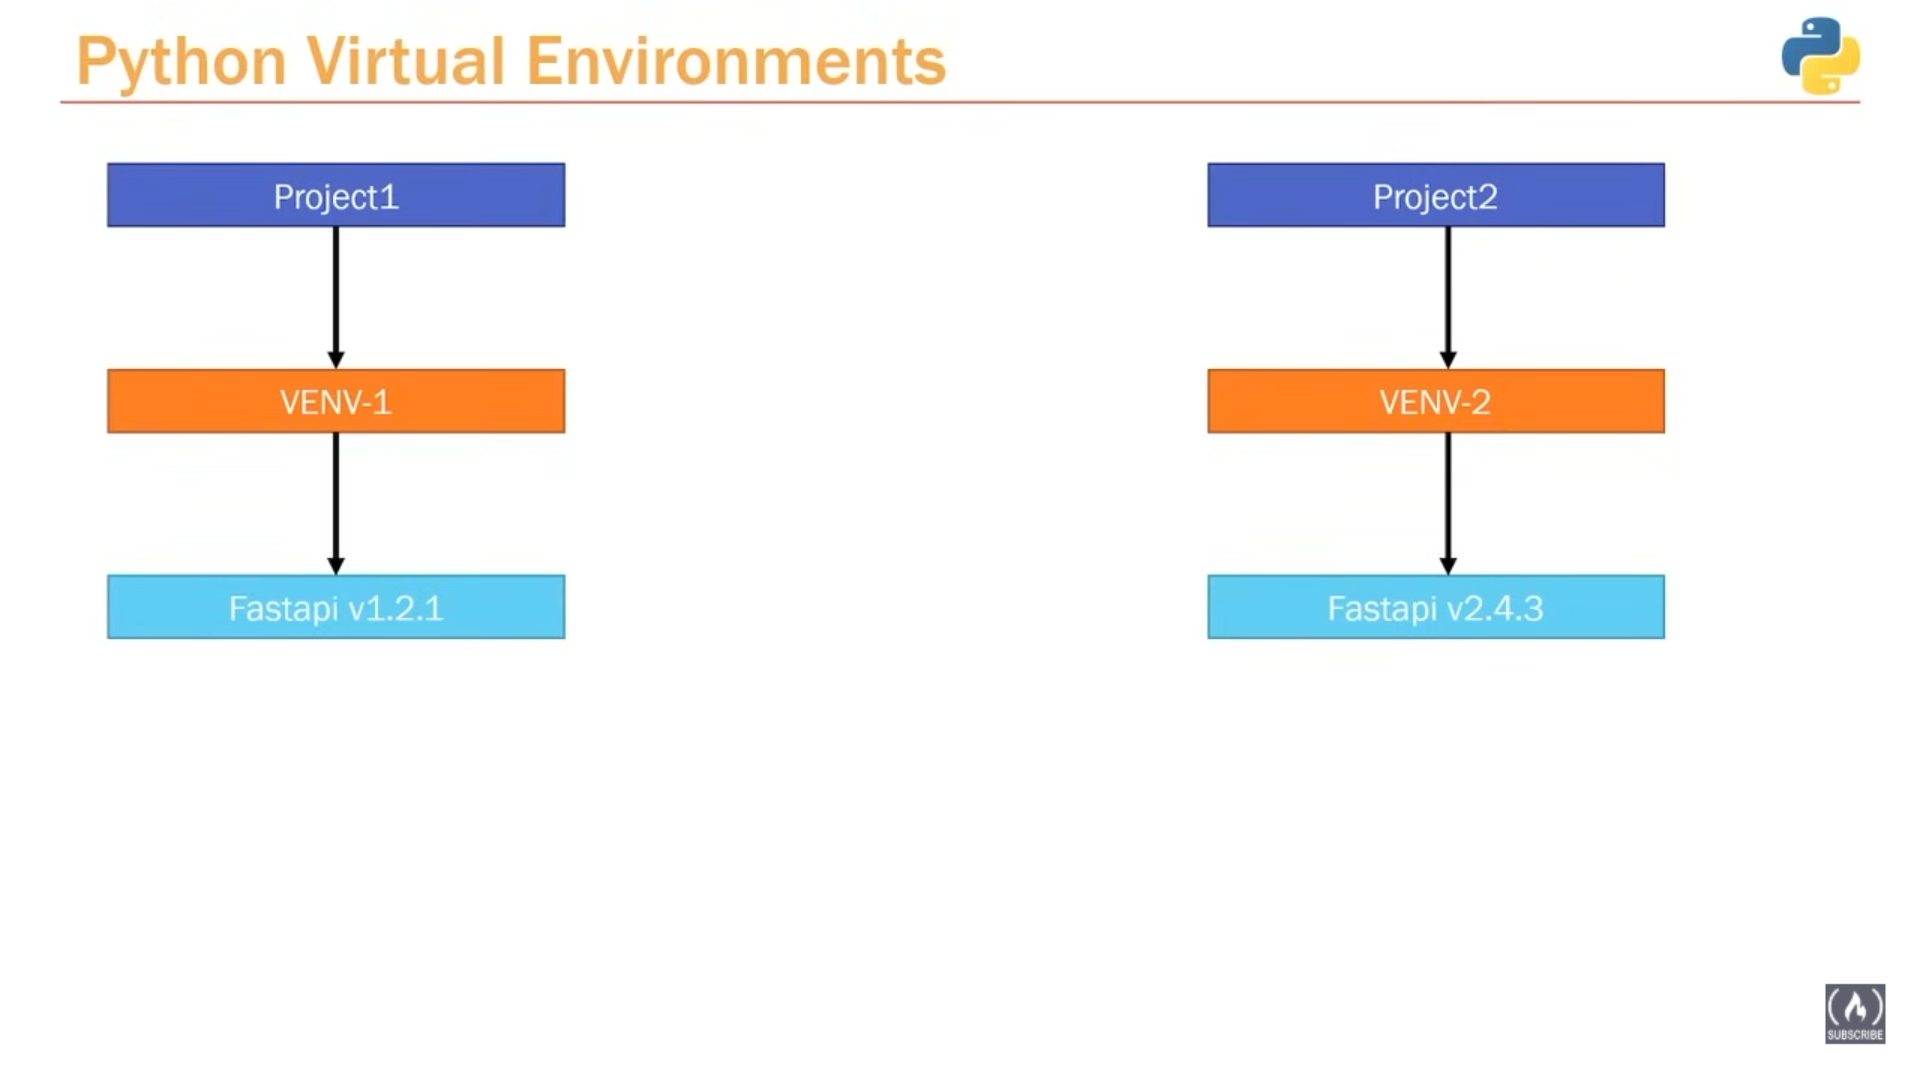

```bash

ferganey@ferganey-Inspiron-5570:~/GitHub/personal/Final_Learning_AI/07_Computer_Vision/02_APIs/00_API_COURSE_PROJECT$ python3 -m venv venv
    ./venv/bin/python3.10


```

# **2- Fast API**

```bash
uvicorn main:app --reload
```

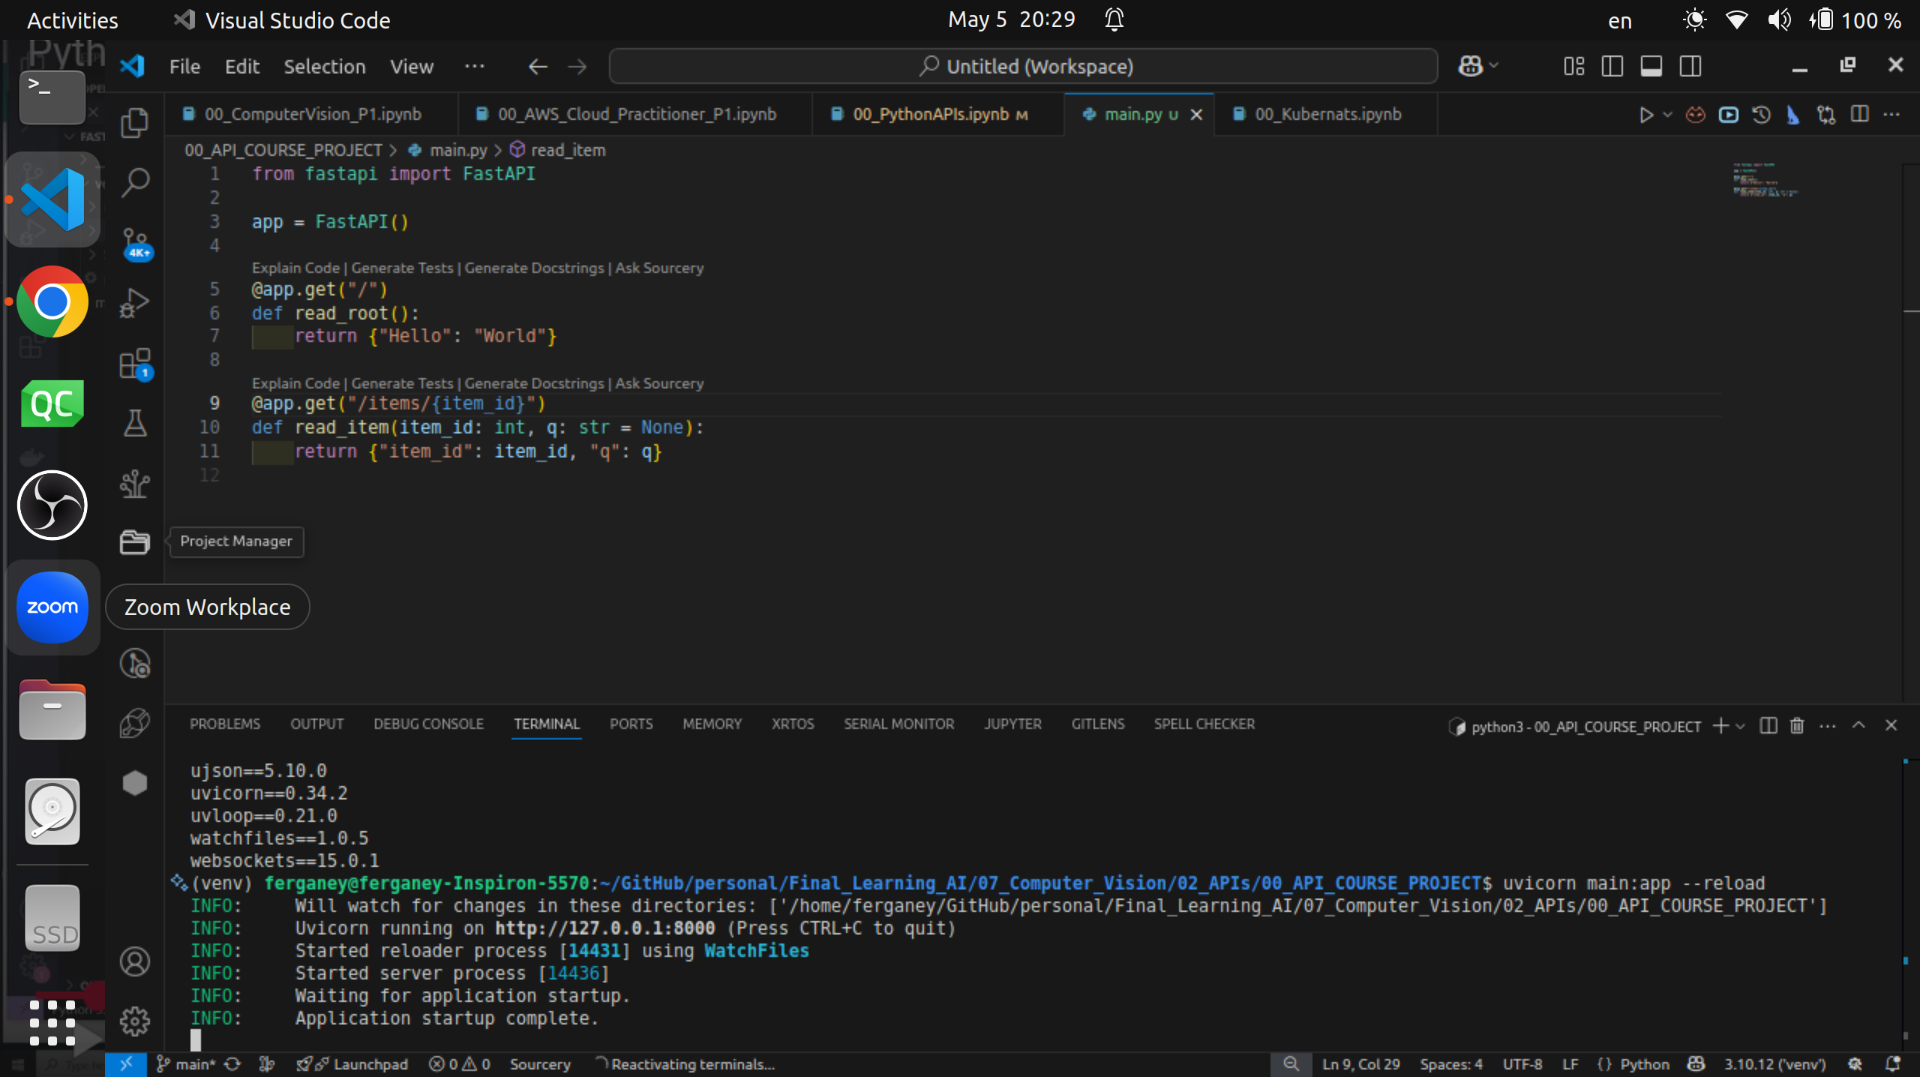

```python

#Imports the FastAPI class from the fastapi module.
from fastapi import FastAPI
#Creates an instance of the FastAPI application.
app = FastAPI()

"""
This is a decorator that tells FastAPI:

“Run the following function when a GET request is made to the root path /.”
"""
"""
Use async when:

You're doing non-blocking operations (e.g. await database.fetch(), await http_request()).

You want better concurrency with lower latency.
"""
# http://127.0.0.1:8000/
@app.get("/")
async def read_root():
    # It returns a JSON response: {"Hello": "World"}
    return {"Hello": "World"}


"""
This decorator creates another route:

It matches GET requests like /items/10, /items/99, etc.

{item_id} is a path parameter, extracted from the URL.

"""
@app.get("/items/{item_id}")
def read_item(item_id: int, q: str = None):
    return {"item_id": item_id, "q": q}

```


## **[HTTP request methods](https://developer.mozilla.org/en-US/docs/Web/HTTP/Reference/Methods)**

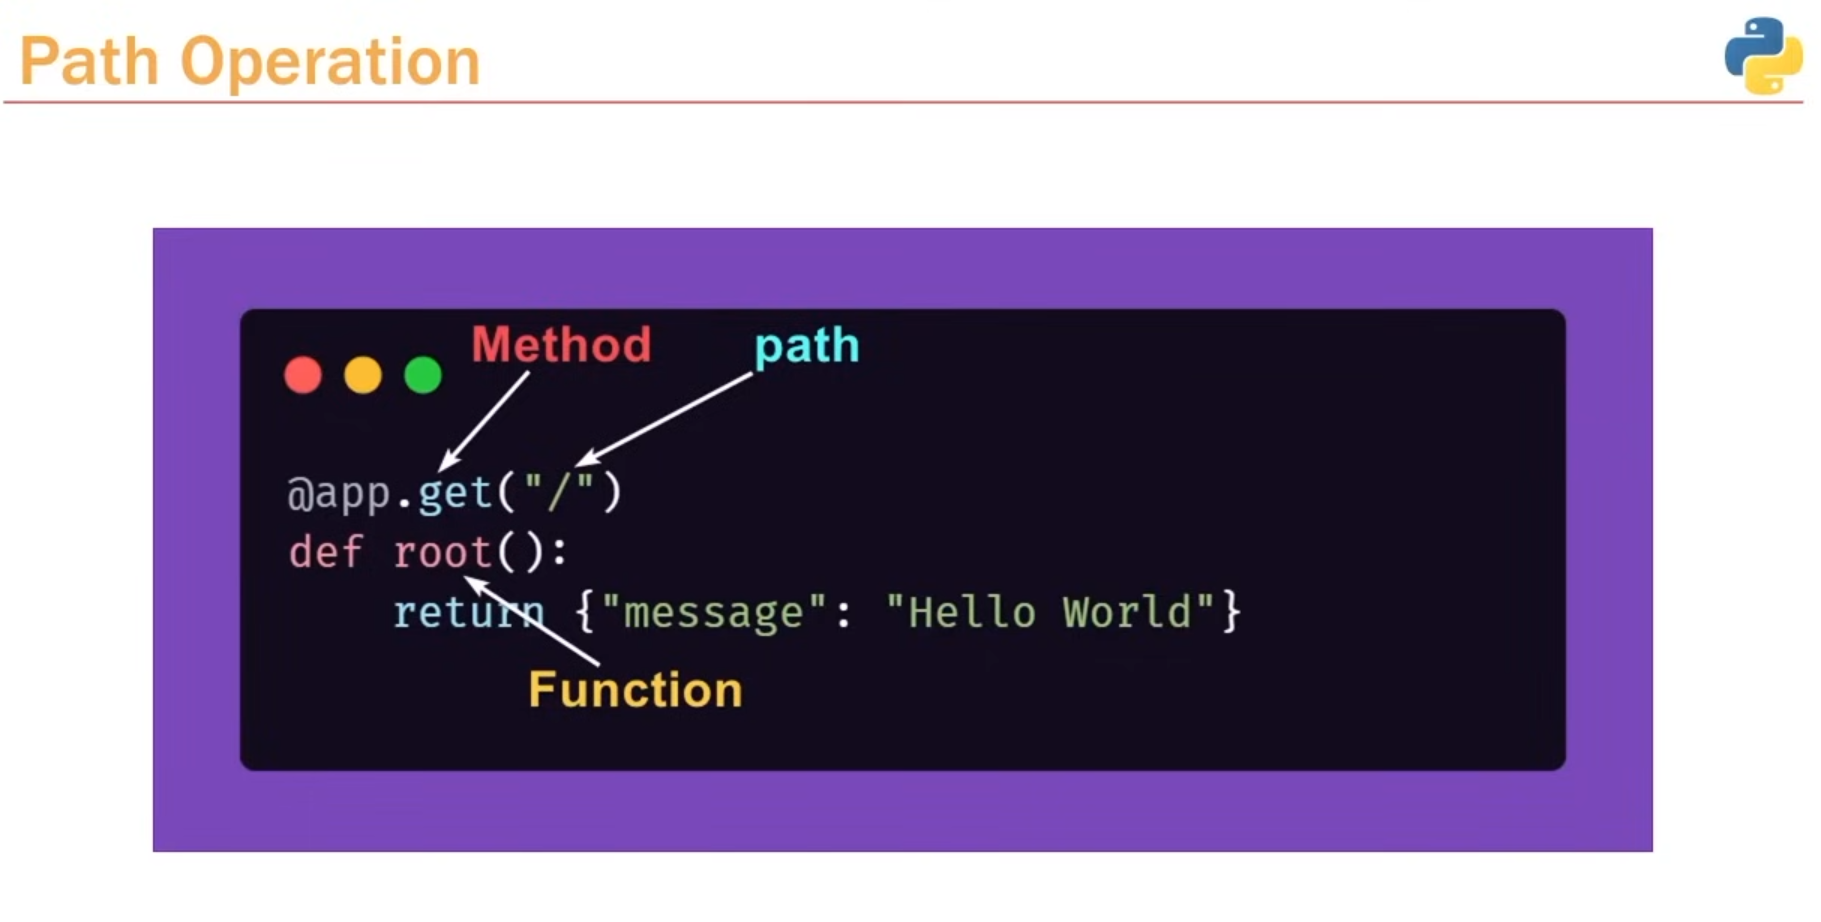

## **Postman for FastAPI**

### [Using Postman with FastAPI](https://www.postman.com/)

Postman is an excellent tool for interacting with your FastAPI application, especially during development, testing, and debugging. Here’s a clear breakdown of how Postman helps you with FastAPI:



| Feature                            | Description                                                                 |
|------------------------------------|-----------------------------------------------------------------------------|
| 🔗 Send Requests                   | Easily test FastAPI endpoints (GET, POST, PUT, DELETE, etc.).              |
| 📤 Send Body Data                  | Use JSON, form-data, or raw inputs for POST and PUT requests.              |
| 📬 Set Headers                     | Customize headers like Content-Type, Authorization, etc.                   |
| 🔐 Authorization                  | Use tokens (Bearer, OAuth2, API keys) to test secured routes.              |
| 👁️ View Responses                 | Inspect status code, headers, JSON body, and response time.                |
| 📁 File Uploads                    | Test file upload endpoints using `multipart/form-data`.                    |
| 🧪 Automated Tests                 | Use test scripts to validate response content automatically.               |
| 🗃️ Save Collections               | Organize and save multiple requests for repeated testing.                  |
| 🌍 Manage Environments             | Define variables for local, staging, or production APIs.                   |


```bash

ferganey@ferganey-Inspiron-5570:~/Downloads/programmes$ tar -xvzf postman-linux-x64.tar.gz


ferganey@ferganey-Inspiron-5570:~/Downloads/programmes$ sudo mv Postman /opt/
 
ferganey@ferganey-Inspiron-5570:~/Downloads/programmes$ sudo ln -s /opt/Postman/Postman /usr/bin/postman

ferganey@ferganey-Inspiron-5570:~/Downloads/programmes$ sudo mv Postman /opt/

ferganey@ferganey-Inspiron-5570:~/Downloads/programmes$ postman



```


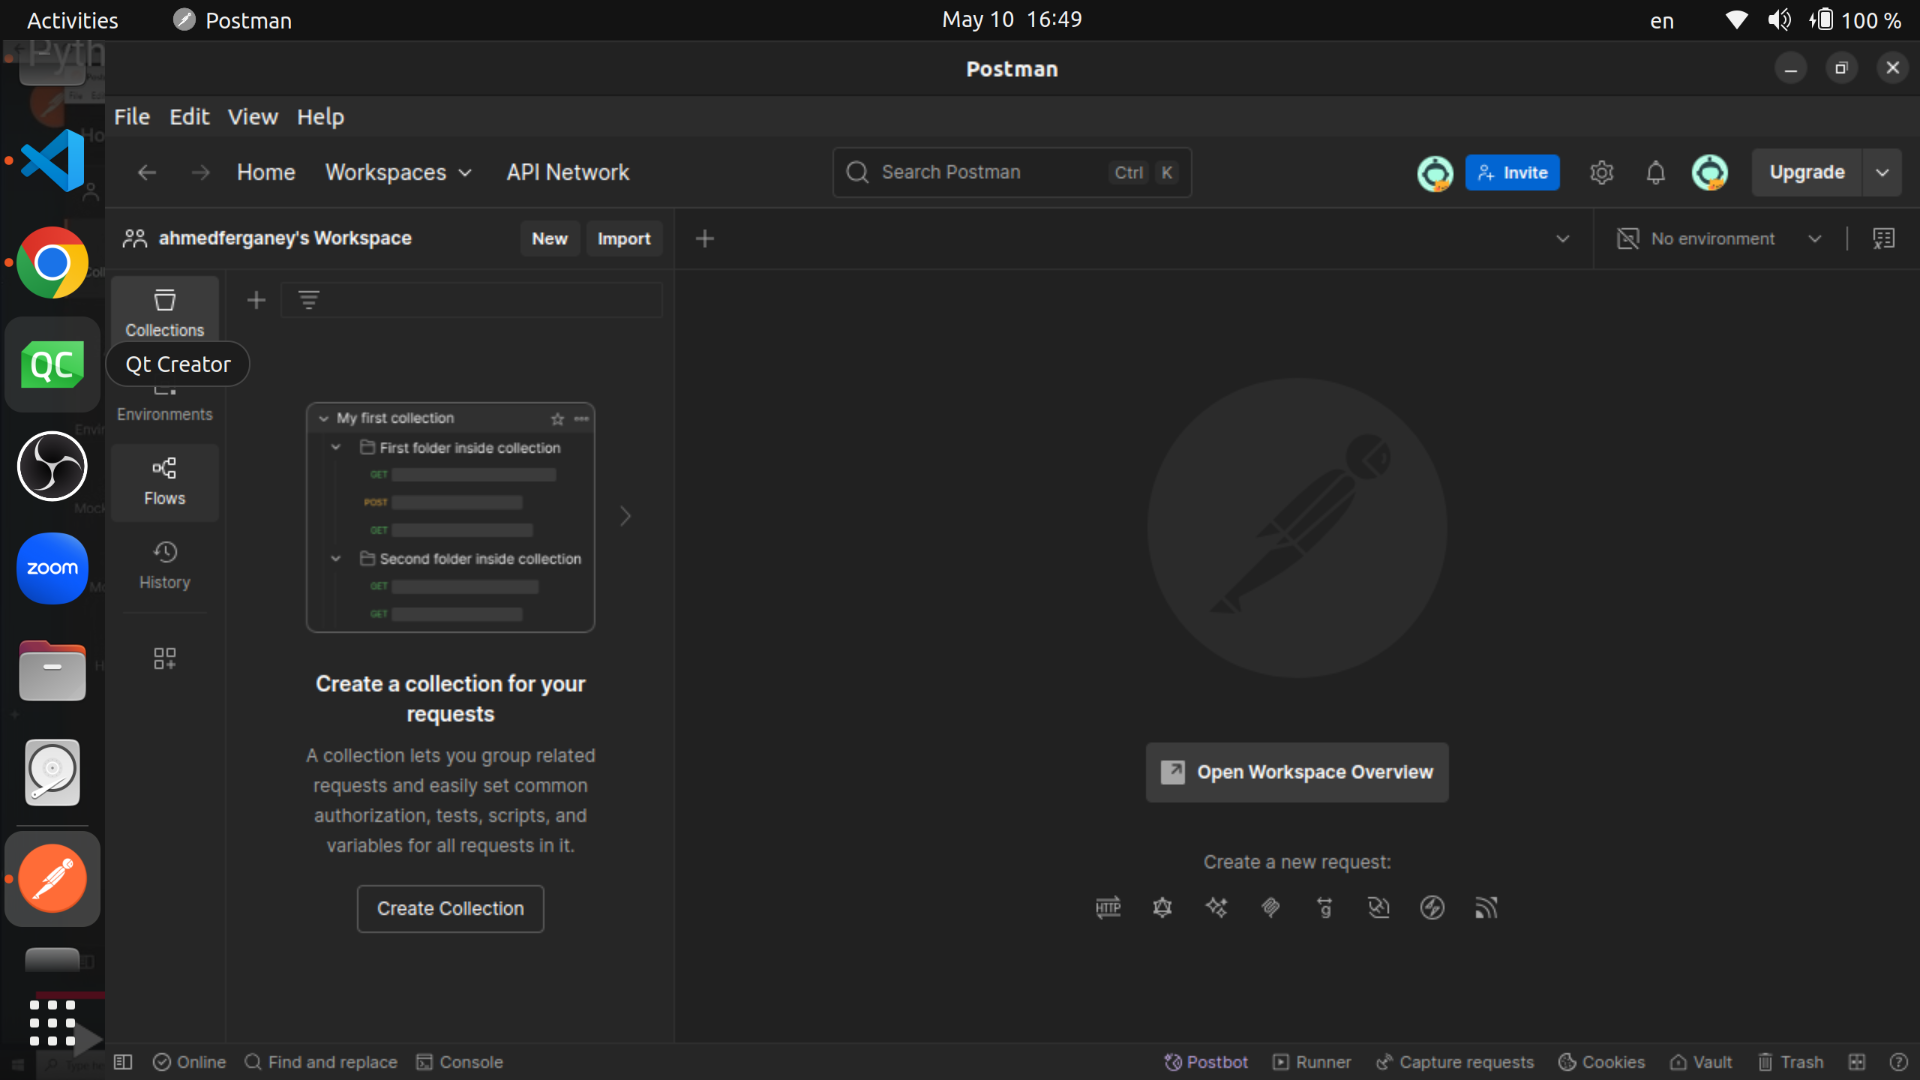

### Example: POST Request to FastAPI

**FastAPI Code**
```python
from pydantic import BaseModel
from fastapi import FastAPI

app = FastAPI()

class Item(BaseModel):
    name: str
    price: float

@app.post("/items/")
def create_item(item: Item):
    return {"item": item}
```

#### Postman Setup

Method: POST

URL: http://127.0.0.1:8000/items/

Body → Raw → JSON:

```json
{
  "name": "Mouse",
  "price": 25.5
}

```
**Expected Response**

```json
{
  "item": {
    "name": "Mouse",
    "price": 25.5
  }
}


```

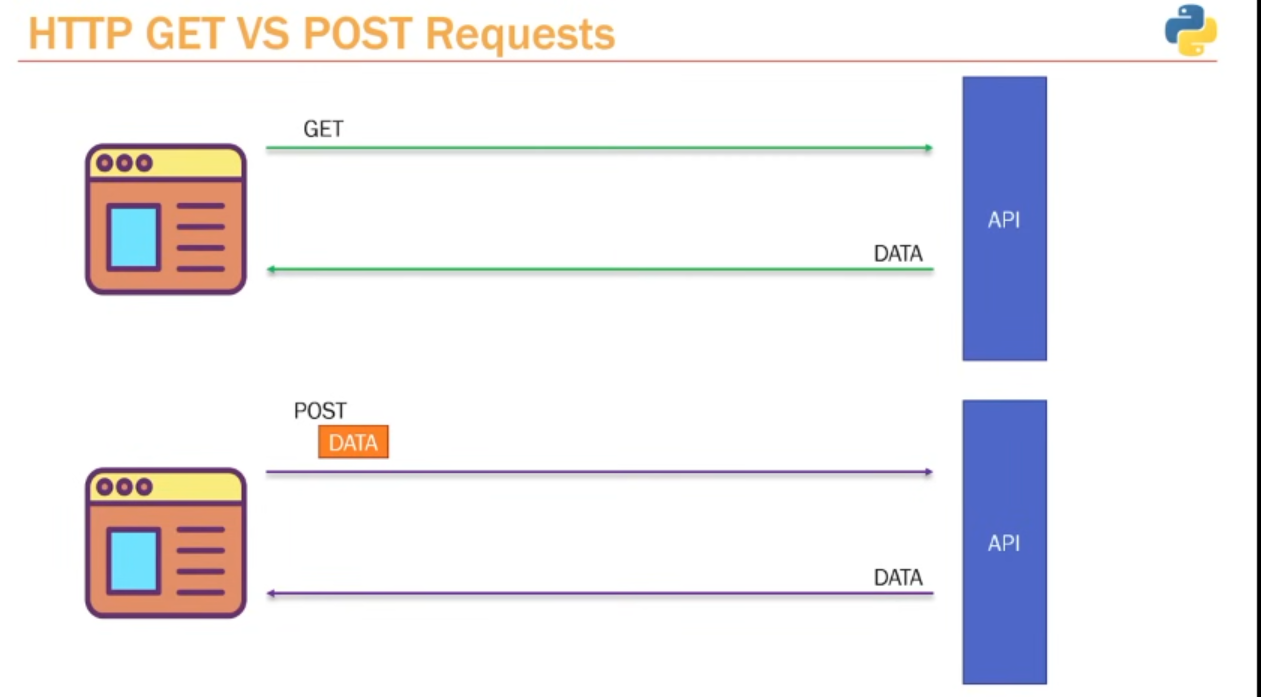

### 📡 HTTP GET vs POST Request

| Feature                  | GET                                             | POST                                             |
|--------------------------|--------------------------------------------------|--------------------------------------------------|
| 🔄 Purpose               | Retrieve data (read-only)                       | Send data to the server (create/update)         |
| 📤 Sends Data            | Through the URL (query string)                  | Through the body of the request                 |
| 👀 Visible in URL        | Yes (e.g., `/search?q=value`)                  | No (data hidden in body)                        |
| 🗂️ Cached                | Yes (by browser and proxies)                    | No (not cached by default)                      |
| 🔁 Repeatable/Safe       | Yes – idempotent and safe                       | No – may have side effects                      |
| 📜 Bookmarkable          | Yes                                              | No                                               |
| 🔐 Security              | Less secure (data exposed in URL)              | More secure (sensitive data stays in body)      |
| 🌐 Use Case Examples     | Fetching articles, search queries              | Login, registration, form submissions           |

---

#### 🧪 Example in FastAPI

##### ✅ GET Example

```python
@app.get("/items")
def get_items(q: str):
    return {"query": q}
```

**Request:**

```bash
GET /items?q=shoes
```

##### ✅ Post example

```python
from pydantic import BaseModel

class Item(BaseModel):
    name: str
    price: float

@app.post("/items")
def create_item(item: Item):
    return {"item": item}

```
**Request:**
```bash
POST /items
Content-Type: application/json

{
  "name": "Laptop",
  "price": 999.99
}
```



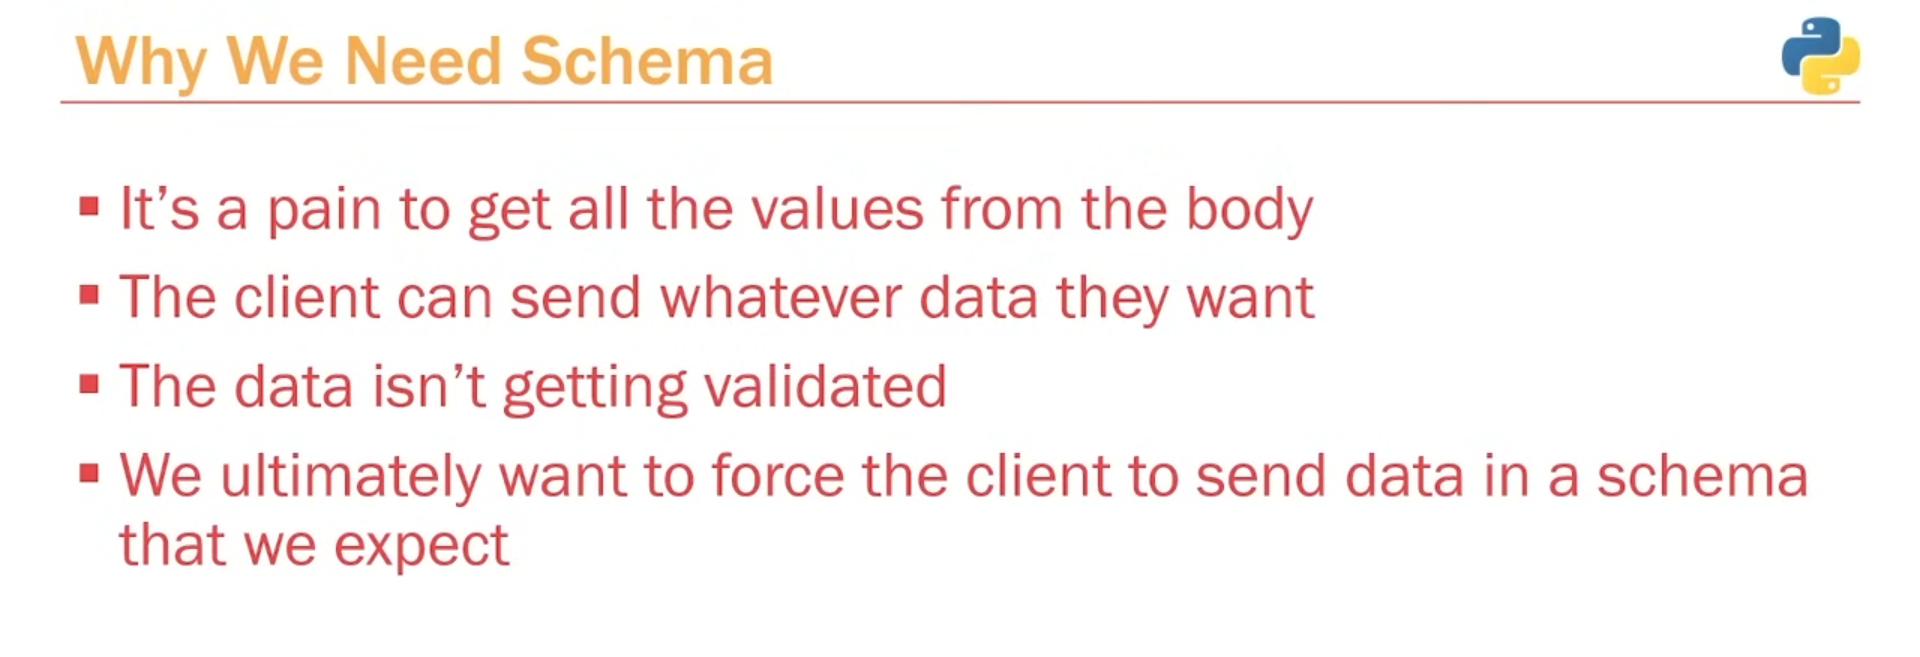

## **pedantic library**

 - we use this library to describe type of data that should be sent

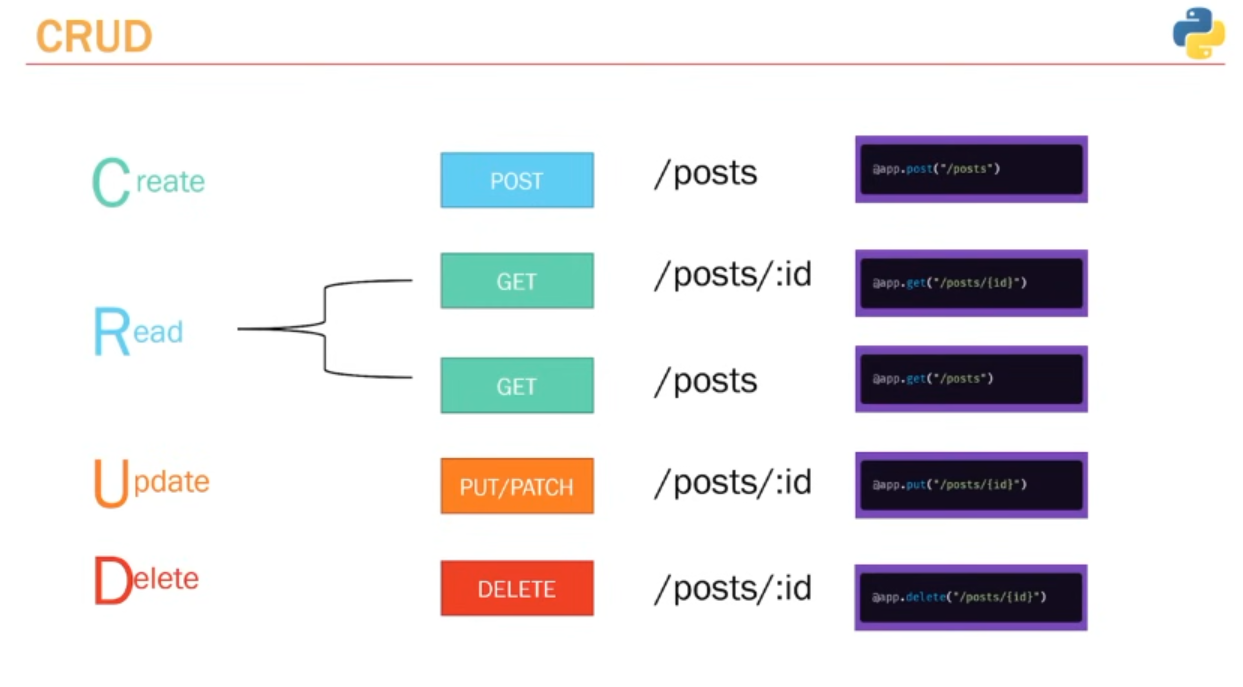

## **📊 HTTP Status Code Categories**


HTTP status codes are 3-digit responses from the server indicating the result of a request.


 - 📊 Categories of HTTP Status Codes

| Code Range | Category       | Description                                        |
|------------|----------------|----------------------------------------------------|
| **1xx**    | Informational  | Request received, continuing process               |
| **2xx**    | Success        | The request was successfully received and processed|
| **3xx**    | Redirection    | Further action must be taken to complete the request|
| **4xx**    | Client Error   | The request contains incorrect syntax or cannot be fulfilled |
| **5xx**    | Server Error   | The server failed to process a valid request       |

---

 - ✅ Common HTTP Status Codes

| Code | Name                     | Meaning                                                              |
|------|--------------------------|----------------------------------------------------------------------|
| 200  | OK                       | The request was successful                                           |
| 201  | Created                  | Resource was created successfully                                    |
| 204  | No Content               | Request successful but no content to return                          |
| 301  | Moved Permanently        | The resource has permanently moved to a new URL                      |
| 302  | Found                    | Temporary redirection to another URL                                 |
| 400  | Bad Request              | The server could not understand the request                          |
| 401  | Unauthorized             | Authentication required                                              |
| 403  | Forbidden                | Authenticated but not permitted                                      |
| 404  | Not Found                | Resource could not be found                                          |
| 405  | Method Not Allowed       | Method is not allowed on this resource                              |
| 409  | Conflict                 | Conflict with current state of the resource                          |
| 500  | Internal Server Error    | The server encountered an unexpected condition                      |
| 502  | Bad Gateway              | Invalid response from the upstream server                            |
| 503  | Service Unavailable      | Server is currently unable to handle the request                     |

---

```python
from fastapi import HTTPException

@app.get("/item/{item_id}")
def read_item(item_id: int):
    if item_id == 0:
        raise HTTPException(status_code=404, detail="Item not found")
    return {"item_id": item_id}
```